### Overview

### Dataset

The dataset is owned by the CMS and is part of the inpatient utilization and payment public use file. The dataset provides information on utilization, payment (total payment and Medicare payment), and hospital-specific charges for over 3,000 U.S. hospitals that receive Medicare Inpatient Prospective Payment System (IPPS) payments. The dataset includes about 201k rows and 12 columns. The data is organized by hospital and Medicare Severity Diagnosis Related Group (MS-DRG).

“Average Charges” refers to what the provider bills to Medicare.

“Average Total Payments” refers to what Medicare actually pays to the provider as well as co-payment and deductible amounts that the beneficiary is responsible for.

### Average hospital charges and payments by state
Average hospital charges and payments differ across the U.S., with many procedures costing more in some states than others. We have ranked states by average Medicare payments, average total payments as well as by average covered charges. States with the highest hospital charges are California, New Jersey, Pennsylvania, Colorado, Nevada, Florida and Alaska while states with the highest average Medicare payments are Maryland, California, Alaska, New York, Washington, Massachusetts and Hawaii.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
data = pd.read_csv("Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
data.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667


In [3]:
data.shape

(163065, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [5]:
data.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [6]:
data.isnull().sum()

DRG Definition                                0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Total Discharges                              0
Average Covered Charges                       0
Average Total Payments                        0
Average Medicare Payments                     0
dtype: int64

In [7]:
data["Provider State"].value_counts().head(15)

CA    13064
TX    11864
FL    11155
NY     9178
IL     7909
PA     7804
OH     7012
MI     5419
NC     5041
GA     4968
NJ     4826
VA     4332
IN     4260
TN     4168
MO     4059
Name: Provider State, dtype: int64

### Most Common Medicare inpatient discharge diagnoses
Our analysis has shown that among the most common Medicare hospital discharge diagnoses in 2011 were Simple Pneumonia & Pleurisy,Kidney & Urinary Tract Infections W/O MCC, Heart Failure & Shock W CC, ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC,MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC.

In [32]:
data["DRG Definition"].value_counts().head(10)

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    2812
603 - CELLULITIS W/O MCC                                                    2807
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    2750
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC                            2720
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                           2713
Name: DRG Definition, dtype: int64

In [9]:
data_by_code_state = data[["DRG Definition","Provider Name","Provider State","Total Discharges","Average Covered Charges","Average Total Payments","Average Medicare Payments"]]

In [10]:
# Option #1
data_by_state =data_by_code_state.groupby(["DRG Definition","Provider State"], as_index = False)["Average Covered Charges","Average Total Payments","Average Medicare Payments"].mean()

In [11]:
# Option 2
#data_by_code_state =data_by_state.groupby(["DRG Definition","Provider State"], as_index = False).agg({"Average Covered Charges": "mean","Average Total Payments":"mean","Average Medicare Payments":"mean"})

In [12]:
data_by_state.head()

,DRG Definition,Provider State,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,34805.130430,8401.956522,6413.782609
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,32044.441514,5743.615891,4599.596881
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,27463.268018,6118.832486,4938.716691
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,33443.363359,7271.558983,5912.837259
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,56094.934561,8387.936667,6878.958616


In [13]:
procedure_codes= data_by_code_state["DRG Definition"].unique().tolist()
procedure_codes

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
 '069 - TRANSIENT ISCHEMIA',
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
 '101 - SEIZURES W/O MCC',
 '149 - DYSEQUILIBRIUM',
 '176 - PULMONARY EMBOLISM W/O MCC',
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC',
 '202 - BRONCHITIS & ASTHMA W CC/MCC',
 '203 - BRONCHITIS & ASTHMA W/O CC/

In [14]:
data_by_state = data_by_code_state.groupby("Provider State", as_index = False).agg({"Average Covered Charges": "mean","Average Total Payments":"mean","Average Medicare Payments":"mean"})

In [15]:
data_by_state.head()

,Provider State,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,AK,40348.747302,14572.395796,12958.973677
1,AL,31316.466350,7568.236166,6418.011329
2,AR,26174.530353,8019.252815,6919.725054
3,AZ,41200.067125,10154.532272,8825.721445
4,CA,67508.620696,12629.672379,11494.385763


### State Ranked by highest average hospital charges

In [16]:
data_by_state[data_by_state["Average Covered Charges"] ==data_by_state["Average Covered Charges"].max()]["Provider State"]

4    CA
Name: Provider State, dtype: object

In [17]:
data_top10_state_covered = data_by_state.sort_values("Average Covered Charges", ascending = False)
data_top10_state_covered[["Provider State","Average Covered Charges"]].head(10)

,Provider State,Average Covered Charges
4,CA,67508.620696
31,NJ,66125.690484
33,NV,61047.119709
9,FL,46016.237809
43,TX,41480.197581
3,AZ,41200.067125
5,CO,41095.140164
0,AK,40348.747302
7,DC,40116.668129
38,PA,39633.963945


In [18]:
data_top10_state_covered = data_top10_state_covered[["Provider State","Average Covered Charges"]].head(10)

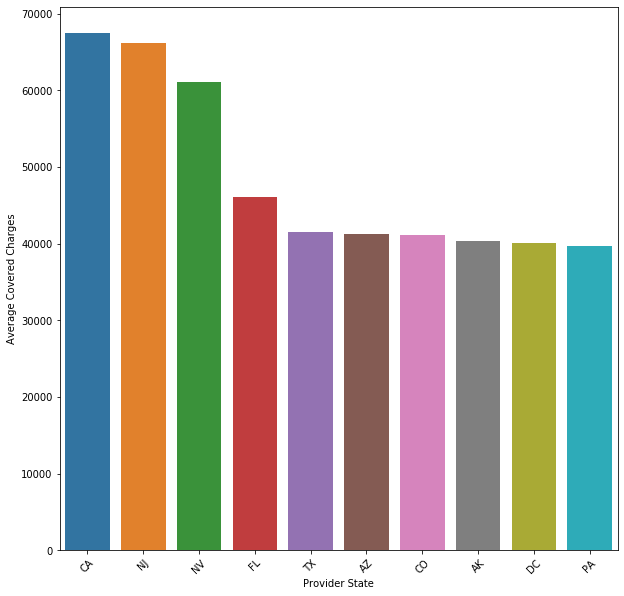

In [19]:
plt.figure(figsize= (10,10))
a= sns.barplot(x = "Provider State", y = "Average Covered Charges", data = data_top10_state_covered)
plt.xticks(rotation = 45)
plt.show()

### State Ranked by highest average Medicare payments

In [20]:
data_by_state[data_by_state["Average Medicare Payments"]== data_by_state["Average Medicare Payments"].max()]["Provider State"]

0    AK
Name: Provider State, dtype: object

In [21]:
data_top10_state_medicare = data_by_state.sort_values("Average Medicare Payments", ascending = False)
data_top10_state_medicare[["Provider State","Average Medicare Payments"]].head(10)

,Provider State,Average Medicare Payments
0,AK,12958.973677
7,DC,11811.972137
4,CA,11494.385763
20,MD,11480.126155
11,HI,10967.479069
34,NY,10620.740627
46,VT,10546.974395
6,CT,10104.597206
31,NJ,9586.944313
50,WY,9539.396260


In [22]:
data_top10_state_medicare = data_top10_state_medicare[["Provider State","Average Medicare Payments"]].head(10)

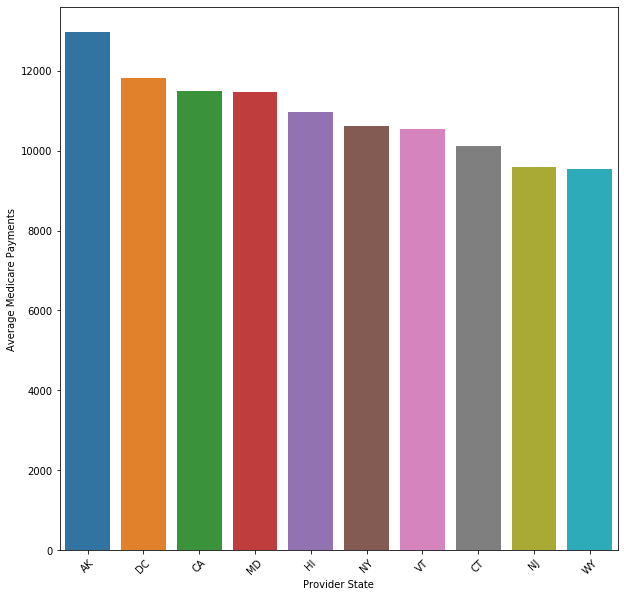

In [23]:
plt.figure(figsize= (10,10))
a= sns.barplot(x = "Provider State", y = "Average Medicare Payments", data = data_top10_state_medicare)
plt.xticks(rotation = 45)
plt.show()

### Highest Cost Claim by Provider

In [24]:
data_by_highest_claim = data_by_code_state.groupby(["Provider Name","Provider State"], as_index = False)["Average Covered Charges"].mean()
data_by_highest_claim2 = data_by_highest_claim.sort_values("Average Covered Charges",ascending = False)
data_by_highest_claim2 = data_by_highest_claim2.head(10)
data_by_highest_claim2

,Provider Name,Provider State,Average Covered Charges
3122,UVA HEALTH SCIENCES CENTER,VA,211922.000000
206,BAYONNE HOSPITAL CENTER,NJ,147441.337388
678,DOCTORS MEDICAL CENTER,CA,144695.837072
2839,STANFORD HOSPITAL,CA,138818.653932
1946,NORTHBAY MEDICAL CENTER,CA,138504.549580
604,CROZER CHESTER MEDICAL CENTER,PA,137130.851966
3181,WASHINGTON HOSPITAL,CA,131510.126440
2489,SETON MEDICAL CENTER,CA,130177.366167
2915,TEMPLE UNIVERSITY HOSPITAL,PA,126824.329151
2274,REGIONAL MEDICAL CENTER OF SAN JOSE,CA,126288.698255


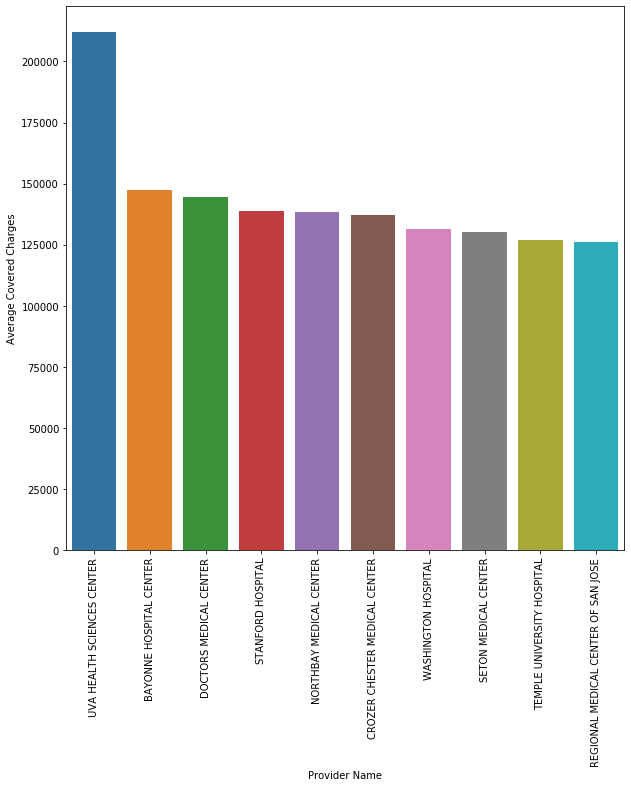

In [25]:
plt.figure(figsize= (10,10))
a= sns.barplot(x = "Provider Name", y = "Average Covered Charges", data = data_by_highest_claim2)
plt.xticks(rotation = 90)
plt.show()

### Highest Cost Claim by Region

In [28]:
data_by_highest_claim_region = data_by_code_state.groupby("Provider State", as_index = False)["Average Covered Charges"].mean()
data_by_highest_claim2_region = data_by_highest_claim_region.sort_values("Average Covered Charges",ascending = False)
data_by_highest_claim2_region = data_by_highest_claim2_region.head(10)
data_by_highest_claim2_region

,Provider State,Average Covered Charges
4,CA,67508.620696
31,NJ,66125.690484
33,NV,61047.119709
9,FL,46016.237809
43,TX,41480.197581
3,AZ,41200.067125
5,CO,41095.140164
0,AK,40348.747302
7,DC,40116.668129
38,PA,39633.963945


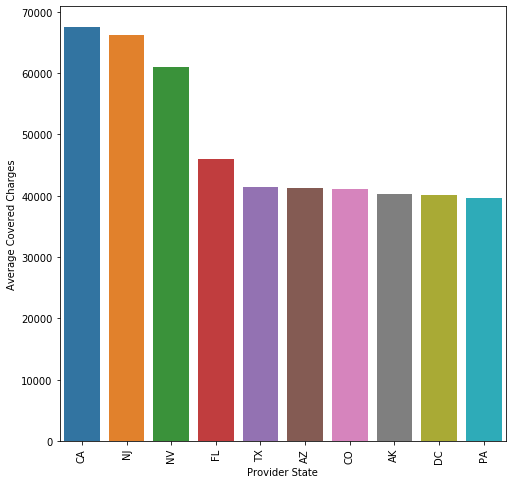

In [30]:
plt.figure(figsize= (8,8))
a= sns.barplot(x = "Provider State", y = "Average Covered Charges", data = data_by_highest_claim2_region)
plt.xticks(rotation = 90)
plt.show()

### Most Expensive Health conditions 
are 1.SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS, 2.RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS, 3.INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC, 4.INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC, 5.PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS

In [38]:
data_exp_health = data_by_code_state.groupby("DRG Definition", as_index= False)["Average Covered Charges"].mean()
data_exp_health = data_exp_health.sort_values("Average Covered Charges", ascending = False).head()
data_exp_health.head()

,DRG Definition,Average Covered Charges
92,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,163227.335864
21,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,143428.055060
91,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,139186.354961
52,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,135330.944034
26,246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,96348.810617


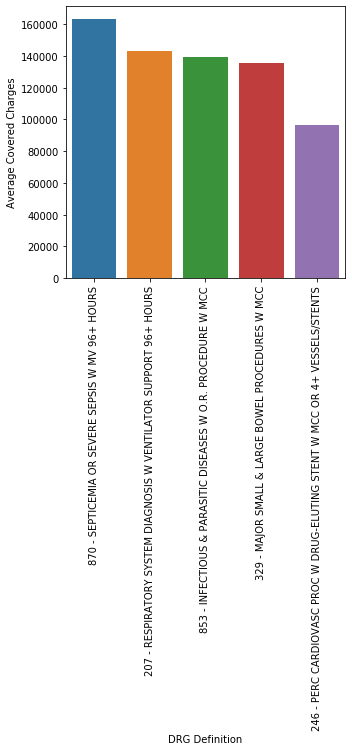

In [42]:
plt.figure(figsize= (5,5))
a= sns.barplot(x = "DRG Definition", y = "Average Covered Charges", data = data_exp_health)
plt.xticks(rotation = 90)
plt.show()

In [50]:
data_state = data[["DRG Definition","Provider Name","Provider State","Total Discharges",
                           "Average Covered Charges","Average Total Payments","Average Medicare Payments"]]

In [51]:
data_CA = data_state[data_state["Provider State"]== "CA"]
data_CA.head()

,DRG Definition,Provider Name,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
64,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST JOSEPH HOSPITAL,CA,48,44664.45833,8227.145833,6936.520833
65,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,PENINSULA MEDICAL CENTER,CA,16,51950.87500,7863.000000,6872.500000
66,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST HELENA HOSPITAL,CA,17,105929.47060,9438.000000,8376.352941
67,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MERCY GENERAL HOSPITAL,CA,27,66207.66667,10863.222220,6924.703704
68,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,GROSSMONT HOSPITAL,CA,26,40062.46154,7449.807692,6358.076923


In [54]:
data_CA.shape

(13064, 7)

In [56]:
data_CA["DRG Definition"].value_counts()

871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC        273
292 - HEART FAILURE & SHOCK W CC                                256
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                 254
194 - SIMPLE PNEUMONIA & PLEURISY W CC                          248
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC    248
                                                               ... 
305 - HYPERTENSION W/O MCC                                       49
885 - PSYCHOSES                                                  45
203 - BRONCHITIS & ASTHMA W/O CC/MCC                             41
684 - RENAL FAILURE W/O CC/MCC                                   39
301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC                   32
Name: DRG Definition, Length: 100, dtype: int64

In [71]:
data_CA_heart = data_CA[data_CA["DRG Definition"]== "292 - HEART FAILURE & SHOCK W CC"]
data_CA_heart = data_CA_heart.sort_values("Average Medicare Payments", ascending = False)
data_CA_heart.head(10)

,DRG Definition,Provider Name,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
63314,292 - HEART FAILURE & SHOCK W CC,CONTRA COSTA REGIONAL MEDICAL CENTER,CA,30,26569.30000,16916.50000,16129.43333
63297,292 - HEART FAILURE & SHOCK W CC,SAN FRANCISCO GENERAL HOSPITAL,CA,52,54777.09615,16253.78846,15519.78846
63334,292 - HEART FAILURE & SHOCK W CC,ALAMEDA COUNTY MEDICAL CENTER,CA,21,39353.04762,14995.52381,14353.23810
63217,292 - HEART FAILURE & SHOCK W CC,LAC/OLIVE VIEW-UCLA MEDICAL CENTER,CA,22,38672.31818,14838.77273,14328.59091
63215,292 - HEART FAILURE & SHOCK W CC,SANTA CLARA VALLEY MEDICAL CENTER,CA,56,39379.30357,14667.71429,13967.07143
63311,292 - HEART FAILURE & SHOCK W CC,RONALD REAGAN UCLA MEDICAL CENTER,CA,92,53728.53261,14513.45652,13875.51087
63370,292 - HEART FAILURE & SHOCK W CC,STANFORD HOSPITAL,CA,105,94994.26667,14527.21905,13852.93333
63352,292 - HEART FAILURE & SHOCK W CC,LAC/HARBOR-UCLA MED CENTER,CA,20,34710.30000,14040.70000,13419.70000
63373,292 - HEART FAILURE & SHOCK W CC,UCSF MEDICAL CENTER,CA,83,62985.87952,15154.73494,13282.49398
63351,292 - HEART FAILURE & SHOCK W CC,LAC+USC MEDICAL CENTER,CA,24,36549.41667,13443.87500,12846.50000


In [75]:
data_CA_heart.describe()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,256.000000,256.000000,256.000000,256.000000
mean,53.980469,43447.295493,8799.078252,7989.303560
std,37.019915,17909.220424,1961.574899,1959.374053
min,11.000000,12447.450000,6004.200000,5260.545455
25%,24.000000,30923.623530,7431.912346,6621.288410
50%,45.500000,39370.788150,8422.346273,7561.986111
75%,79.250000,53299.818908,9663.990741,8891.604336
max,283.000000,94994.266670,16916.500000,16129.433330


In [55]:
data["Provider Name"].value_counts()

GOOD SAMARITAN HOSPITAL                   633
ST JOSEPH MEDICAL CENTER                  427
MERCY MEDICAL CENTER                      357
MERCY HOSPITAL                            347
ST JOSEPH HOSPITAL                        343
                                         ... 
ALLEN PARISH HOSPITAL                       1
BUTLER COUNTY MEDICAL CENTER                1
COORDINATED HEALTH ORTHOPEDIC HOSPITAL      1
BEAVER VALLEY HOSPITAL                      1
BRIGHAM CITY COMMUNITY HOSPITAL             1
Name: Provider Name, Length: 3201, dtype: int64

### Correlations
It looks like there is a strong positive correlation between what hospitals charge and what they are paid by Medicare. According to our analysis, correlation between average covered charges and average Medicare payments is 0.768

In [44]:
data[["Average Covered Charges","Average Medicare Payments"]].corr()

,Average Covered Charges,Average Medicare Payments
Average Covered Charges,1.000000,0.768927
Average Medicare Payments,0.768927,1.000000
